# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

### Integrates de Grupo:

* Wilder Serdan (wserdan@gmail.com)
* Oscar Ramirez (oscar.ramirez.guachalla@gmail.com)
* Ruth Daniela Villalobos (ruthdanivillalobos@gmail.com)

# Tabla de Contenido

1. [Introduccion](#1-introducción)
    * [Objetivos del negocio](#11-objetivo-del-negocio)
2. [Configuracion e Instalacion](#2-configuracion-e-instalacion)
    * [Instalaciones Necesarias](#instalaciones-necesarias)
    * [Librerías Generales](#librerías-generales)
3. [Entendimiento de los Datos](#3-entendimiento-de-los-datos)  
4. [Manipulacion y Limpieza de Datos](#4-manipulación-y-limpieza-de-datos)
    * [Cargado y Visualización de Datos](#cargado-y-visualización-de-datos)
    * [Evaluación Inicial](#evaluación-inicial)
	    * [Campos Categóricos](#campos-categóricos)
	    * [Correlación](#correlación)
	    * [Correñación entre variables categóricas y numericas](#correlación-entre-variables-categóricas-y-numéricas)
	    * [Datos Faltantes](#datos-faltantes)
	    * [Completado de Valores Nulos](#completado-de-valores-nulos)
	    * [Verificación de Valores Nulos](#verificación-de-valores-nulos)
    * [Normalidad](#normalidad)
    * [Droping Data](#droping-data)
	    * [Eliminación de Variables Codependientes](#eliminación-de-variables-codependientes)
	    * [Eliminación de variblaes por Multicolinealidad](#eliminación-de-variables-por-multicolinealidad)
	    * [Creación de Variable "TipoVecindario"](#creación-de-variable-tipovecindario)
    * [Outliers](#outliers)
        * [Outliers GrLivArea](#outliers-grlivarea)
	    * [Outliers PoolArea](#outliers-poolarea)
	    * [Outliers MiscVal](#outliers-miscval)
	    * [Outliers LotArea](#outliers-lotarea)
	    * [Outliers MasVnrArea](#outliers-masvnrarea)
    * [Derived Data](#derived-data)
	    * [Variables Dummy](#variables-dummy)
5. [Analisis de Datos](#5-análisis-de-datos)
6. [Preparacion de Datos y Modelado](#6-preparación-de-datos)
7. [Construccion-del-Modelo](#7-construcción-del-modelo)
8. [Conclusions y Observaciones](#8-conclusiones-y-observaciones)

# 1. Introducción 


Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.
 
### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# 2. Configuracion e Instalacion

### Instalaciones Necesarias

In [9]:
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Librerías Generales

In [10]:
# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns
import sys
from impyute.imputation.cs import mice

# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error,make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OrdinalEncoder
from sklearn import metrics

# Importar Librerias de Estadistica
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, kstest, norm,f_oneway
from scipy import stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
#import shap

# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format 

In [11]:
plt.rcParams.update({'figure.figsize': (10, 20)})

In [12]:
# Leer el DATASET CSV con en un Dataframe.
# Direccion relativa del Dataset
DATA_FILE_PATH = 'dataset.csv'

raw_data = pd.read_csv(DATA_FILE_PATH)

# 3. Entendimiento de los Datos

| N° | Nombre Dato | Significado|   
|---|---|---|
| 1 | Id | Identificador de posición |
| 2 | MSSubClass | Identifica el tipo de vivienda objeto de la venta. |
| 3 | MSZoning | Identifica la clasificación de zonificación general de la venta. |
| 4 | LotFrontage | Pies lineales de calle conectados a la propiedad | 
| 5 | LotArea | Tamaño del lote en pies cuadrados | 
| 6 | Street | Tipo de vía de acceso a la propiedad | 
| 7 | Alley | Tipo de callejón de acceso a la propiedad | 
| 8 | LotShape | Forma general de la propiedad. | 
| 9 | LandContour | Llanura de la propiedad | 
| 10 | Utilities | Tipo de utilidades disponibles | 
| 11 | LotConfig | Configuración de lotes | 
| 12 | LandSlope | Pendiente de la propiedad | 
| 13 | Neighborhood | Ubicaciones físicas dentro de los límites de la ciudad de Ames | 
| 14 | Condition1 | Proximidad a varias condiciones | 
| 15 | Contition2 | Proximidad a varias condiciones (si hay más de una presente) | 
| 16 | BldgType | Tipo de vivienda | 
| 17 | HouseStyle | Estilo de vivienda | 
| 18 | OverallQual | Califica el material general y el acabado de la casa | 
| 19 | OveralCond | Califica el estado general de la casa |
| 20 | YearBuilt | Fecha de construcción original | 
| 21 | YearRemodAdd | Fecha de remodelación (igual que la fecha de construcción si no hay remodelaciones ni adiciones) | 
| 22 | RoofStyle | Tipo de techo | 
| 23 | RoofMatl | Material del techo | 
| 24 | Exterior1st | Revestimiento exterior de la casa | 
| 25 | Exterior2nd | Revestimiento exterior de la casa (si hay más de un material) | 
| 26 | MasVnrType | Tipo de chapa de mampostería | 
| 27 | MasVnrArea | Fábrica de albañilería | 
| 28 | ExterQual | Evalúa la calidad del material en el exterior | 
| 29 | ExterCond | Evalúa el estado actual del material en el exterior | 
| 30 | Foundation | Tipo de cimentación | 
| 31 | BsmtQual | Evalúa la altura del sótano | 
| 32 | BsmtCond | Evalúa el estado general del sótano | 
| 33 | BsmtExposure | Se refiere a las paredes a nivel del jardín o de la huelga | 
| 34 | BsmtFinType1 | Clasificación del área terminada del sótano | 
| 35 | BsmtFinSF1 | Tipo 1 pies cuadrados terminados | 
| 36 | BsmtFinType2 | Clasificación del área terminada del sótano (si hay varios tipos) | 
| 37 | BsmtFinSF2 | Tipo 2 pies cuadrados terminados | 
| 38 | BsmtUnfSF | pies cuadrados sin terminar del área del sótano | 
| 39 | TotalBsmtSF | pies cuadrados totales del área del sótano | 
| 40 | Heating | Tipo de calefacción | 
| 41 | HeatingQC | Calidad y condición de la calefacción | 
| 42 | CentralAir | Aire acondicionado central | 
| 43 | Electrical | Sistema eléctrico | 
| 44 | 1stFlrSF | Pies cuadrados del primer piso | 
| 45 | 2ndFlrSF | Pies cuadrados del segundo piso | 
| 46 | LowQualFinSF | Pies cuadrados terminados de baja calidad (todos los pisos) | 
| 47 | GrLivArea | Pies cuadrados de superficie habitable sobre el nivel del suelo (suelo) | 
| 48 | BsmtFullBath | Baños completos del sótano | 
| 49 | BsmtHalfBath | Medios baños del sótano | 
| 50 | FullBath | Baños completos sobre rasante | 
| 51 | HalfBath | Medios baños sobre el nivel del suelo | 
| 52 | BedroomAbvGr | Dormitorios sobre el nivel del suelo (NO incluye dormitorios en el sótano) | 
| 53 | KitchenAbvGr | Cocinas sobre rasante | 
| 54 | KitchenQual | Calidad de la cocina | 
| 55 | TotRmsAbvGrd | Total de habitaciones sobre rasante (no incluye baños) | 
| 56 | Functional | Funcionalidad del hogar (suponga que es típico a menos que se justifiquen las deducciones) | 
| 57 | Fireplaces | Número de chimeneas | 
| 58 | FireplaceQu | Calidad de chimenea | 
| 59 | GarageType | Ubicación del garaje | 
| 60 | GarageYrBlt | Año en que se construyó el garaje | 
| 61 | GarageFinish | Acabado interior del garaje | 
| 62 | GarageCars | Tamaño del garaje en capacidad de automóviles | 
| 63 | GarageArea | Tamaño del garaje en pies cuadrados | 
| 64 | GarageQual | Calidad de garaje | 
| 65 | GarageCond | Estado del garaje | 
| 66 | PavedDrive | Entrada pavimentada | 
| 67 | WoodDeckSF | Area de la cubierta de madera en pies cuadrados | 
| 68 | OpenPorchSF | Area de porche abierto en pies cuadrados | 
| 69 | EnclosedPorch | Area de porche cerrado en pies cuadrados | 
| 70 | 3SsnPorch | Área de porche de tres estaciones en pies cuadrados | 
| 71 | ScreenPorch | Área de porche de pantalla en pies cuadrados | 
| 72 | PoolArea | Área de la piscina en pies cuadrados | 
| 73 | PoolQC | Calidad de la piscina | 
| 74 | Fence | Calidad de la cerca | 
| 75 | MiscFeature | Característica miscelánea no incluida en otras categorías | 
| 76 | MiscVal | Valor de la característica miscelánea | 
| 77 | MoSold | Mes vendido (MM) | 
| 78 | YrSold | Año de venta (AAAA) | 
| 79 | SaleType | Tipo de venta | 
| 80 | SaleCondition | Condición de venta | 
| 81 | SalePrice | Precio de la venta | 


# 4. Manipulacion y Limpieza de Datos

### Cargado y Visualización de Datos 

In [13]:
data=pd.read_csv("dataset.csv")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Evaluacion inicial

#### Datos Categoricos y Numericos

In [19]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Imprimir las columnas
print("Numeric columns: ", numeric_cols)
print("Categorical columns: ", categorical_cols)

Numeric columns:  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical columns:  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinTyp

#### Campos Categóricos

In [20]:
num_to_cat=['MSSubClass']#, 'OverallQual', 'OverallCond']#, 'YearBuilt', 'YearRemodAdd','GarageYrBlt', 'MoSold', 'YrSold']
data_recat= data.copy()
data_recat[num_to_cat] = data_recat[num_to_cat].astype(str)
data_recat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Correlación de variables con SalePrice

Correlación de variables con SalePrice


<BarContainer object of 37 artists>

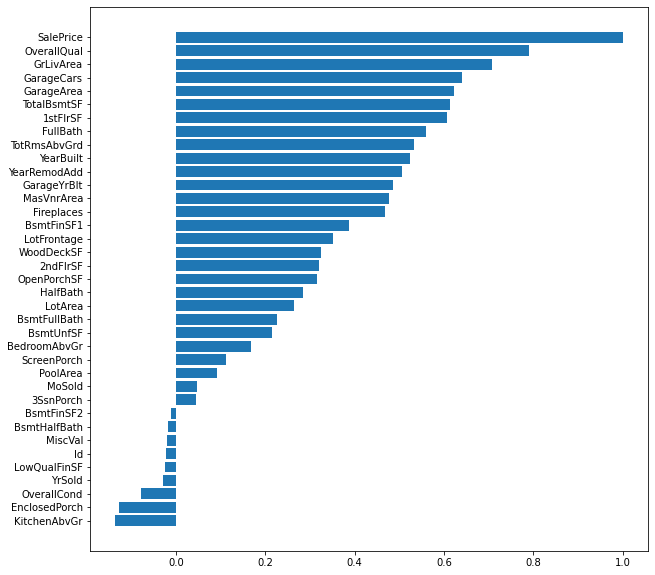

In [21]:
print("Correlación de variables con SalePrice")
corr = data_recat.corr()
corr.sort_values(["SalePrice"], ascending = True, inplace = True)
fig = plt.figure(figsize = (10, 10))
plt.barh(corr.SalePrice.index, corr.SalePrice.values)

Análisis de Correlación entre variables independientes

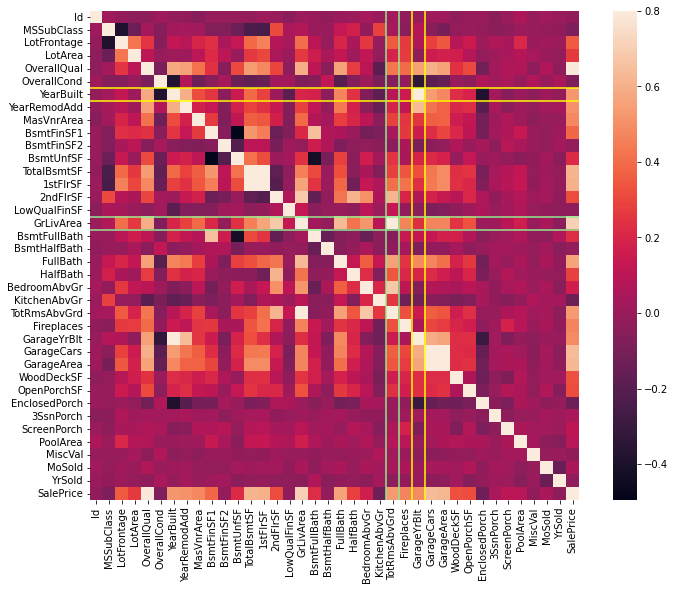

In [22]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)#, annot=True,fmt=".1f");

# Visualmente la correlación entre "YearBulit" y "GarageYrBlt" es alta.
ax.hlines([6,7], colors="yellow",*ax.get_xlim())
ax.vlines([25,26], colors="yellow",*ax.get_ylim())

# Visualmente la correlación entre TotalRooms
ax.hlines([16,17], colors="#90EE90",*ax.get_xlim())
ax.vlines([23,24], colors="#90EE90",*ax.get_ylim())



## Correlación entre variables categóricas y numéricas

#### Funciones para calcular correlación entre distintos tipo de variables (numéricas y categóricas)

In [23]:
def corrNumCat(d,c,n):
  encoder=LabelEncoder()
  encoder.fit(d[c])
  new=c + "_enc"
  d[new]=encoder.transform(d[c])
  corr=d[n].corr(d[new])
  #Esto podemos obviar si vamos a necesitar
  d.drop([new],axis=1, inplace=True)
  print("correlación entre ",c ," y ",n, " es: ",corr)
def corrCatCat(d,c1,c2):
  encoder1=LabelEncoder()
  encoder2=LabelEncoder()
  encoder1.fit(d[c1])
  encoder2.fit(d[c2])
  new1=c1 + "_enc"
  new2=c2 + "_enc"
  d[new1]=encoder1.transform(d[c1])
  d[new2]=encoder2.transform(d[c2])
  corr=d[new1].corr(d[new2])
  #Esto podemos obviar si vamos a necesitar
  d.drop([new1],axis=1, inplace=True)
  d.drop([new2],axis=1, inplace=True)
  print("correlación entre ",c1 ," y ",c2, " es: ",corr)

def CorrNumNum(d,n1,n2):
  x= d[n1]
  y= d[n2]
  corr=x.corr(y)
  print("correlación entre ",n1 ," y ",n2, " es: ",corr)

#### Datos Faltantes o Nulos

In [24]:
# Determinamos cuántos faltantes existen en cada variable independiente

nulos= pd.DataFrame(data.isnull().sum())
nulos= nulos[nulos[0]!=0]
nulos= nulos.sort_values(ascending=False,by=0)
print(nulos[nulos[0]!=0])

                 0
PoolQC        1453
MiscFeature   1406
Alley         1369
Fence         1179
FireplaceQu    690
LotFrontage    259
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1


#### Completado de Valores Nulos

In [25]:
# Función para llenar campos faltantes en "d" con un valor determinado "x"
def datosFaltantes(d,campo,x):
  d[campo]=d[campo].fillna(x)

In [26]:
# Campos con información faltante de acuerdo a resultados anteriores

# Estos campos categóricos los llenamos con "No" debido a que se podido determinar una regla para llenar información faltante
camposMissData=["PoolQC","Alley","Fence","FireplaceQu","GarageType","GarageFinish",
                "GarageQual","GarageCond","BsmtExposure","BsmtFinType2","BsmtCond","BsmtFinType1",
                "BsmtQual","MasVnrType","MiscFeature"]

for campo in camposMissData:
  datosFaltantes(data_recat,campo,"No")  

# Estos campos son pocos y en un analisis del tipo de información que contiene, se llenan con datos particulares
datosFaltantes(data_recat,"MasVnrArea",0) 
datosFaltantes(data_recat,"GarageYrBlt",0)   
datosFaltantes(data_recat,"Electrical","SBrkr")  # SBrkr es un valor estandar en este campo

In [27]:
# Para la variable "LotFrontage", llenamos los datos mediante la técnia mice (Multivariate Imputation by Chained Equation)

dataLot=data_recat[["LotFrontage","LotArea"]].copy()
imputados = pd.DataFrame(mice(dataLot.values))
imputados
data_recat["LotFrontage"]= imputados[0]

In [28]:
data_recat["LotFrontage"].isnull().any()

False

In [29]:
# Verificamos si hay valores nulos
nulos= pd.DataFrame(data_recat.isnull().sum())
nulos= nulos[nulos[0]!=0]

nulos= nulos.sort_values(ascending=False,by=0)
print(nulos[nulos[0]!=0])

ratio=(nulos/len(data_recat.index)*100)
print(ratio[ratio[0]!=0])

Empty DataFrame
Columns: [0]
Index: []
Empty DataFrame
Columns: [0]
Index: []


In [30]:
data_recat.isnull().sum().any()

False

## Normalidad

In [31]:
# Función para visualizar normalidad y transformarla
def verNormalidad(d,var):
  plt.figure(figsize=(8,4))
  sns.distplot(d[var], fit=norm);
  fig = plt.figure()
  plt.figure(figsize=(8,4))
  res = stats.probplot(d[var], plot=plt)

### Variable dependiente SalePrice

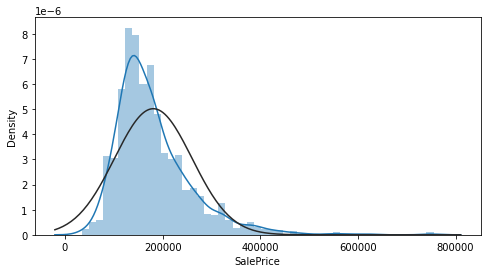

<Figure size 720x1440 with 0 Axes>

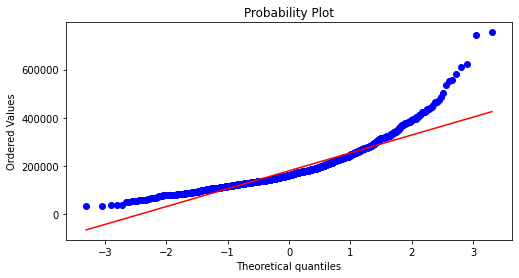

In [32]:
verNormalidad(data_recat,"SalePrice")

In [33]:
# Transformamos la variable mediante la función de Numpy Log
data_recat['SalePrice'] = np.log(data_recat['SalePrice'])

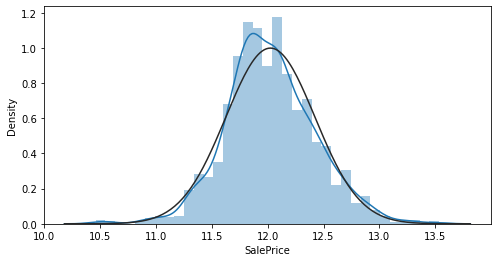

<Figure size 720x1440 with 0 Axes>

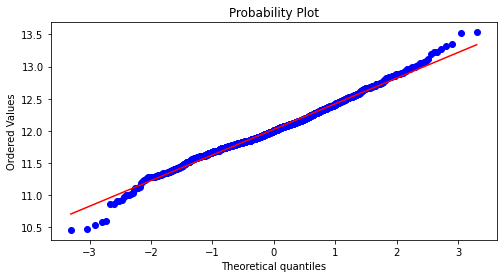

In [34]:
verNormalidad(data_recat,"SalePrice")

In [35]:
# Resultados
print("Asimetría: %f" % data_recat['SalePrice'].skew())
print("Kurtosis: %f" % data_recat['SalePrice'].kurt())
shapiro(data['SalePrice'])

Asimetría: 0.121335
Kurtosis: 0.809532


ShapiroResult(statistic=0.869671642780304, pvalue=3.206247534576162e-33)

* **Resultado**

    Los resultados indican que con el ultimo tratamiento lod datos ahora se ajustan a una curva normal.

## Dropping Data

#### Eliminación de Variables Codependientes

Algunas variables se determinan por la agregación de otras, por lo tanto, para eliminar Multicolinealidad, crearemos algunas y eliminaremos otras

In [36]:
data_recat.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [37]:
# podemos eliminar las variables componentes 
data_recat["TotalSF"]=data_recat["GrLivArea"]+data_recat["TotalBsmtSF"]
#   GrLivArea ='1stFlrSF'+'2ndFlrSF'+'LowQualFinSF'
#  TotalBsmtSF =  'BsmtFinSF1' +'BsmtFinSF2'+ 'BsmtUnfSF'
data_recat["TotalBathrooms"]=data_recat["FullBath"]+(data_recat["HalfBath"]*.5)+data_recat["BsmtFullBath"]+(data_recat["BsmtHalfBath"]*.5)
data_recat["TotaPorchSF"]=data_recat["OpenPorchSF"]+data_recat["3SsnPorch"]+data_recat["EnclosedPorch"]+data_recat["ScreenPorch"]

# Creamos nuevas variables a partir de las dadas inicialmente. Además el año no aporta información al modelo
import datetime
fecha= datetime.date(2023,2,13)     # Fecha actual para calcular la Antiguedad de la casa
ahora = fecha.year+ fecha.month/12
#print(fecha.year) 

data_recat["EdadCasa"]=ahora-data_recat["YearBuilt"]
#data_recat["EdadGarage"]=ahora-data_recat["GarageYrBlt"]
data_recat["EdadVendido"]=ahora-(data_recat["YrSold"]+data_recat["MoSold"]/12)
data_recat["EdadRemod"]=ahora-data_recat["YearRemodAdd"]



In [38]:
# Eliminamos los campos descritos en la celda anterior
columnas_a_borrar=["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath",
                   "OpenPorchSF","3SsnPorch","EnclosedPorch","ScreenPorch",
                  '1stFlrSF','2ndFlrSF','LowQualFinSF',"GrLivArea",
                   'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                   "YearBuilt","YrSold","YearRemodAdd","MoSold"
                   
                   ]
data_recat=data_recat.drop(columnas_a_borrar,axis=1)

### Creación de variable "TipoVecindario"

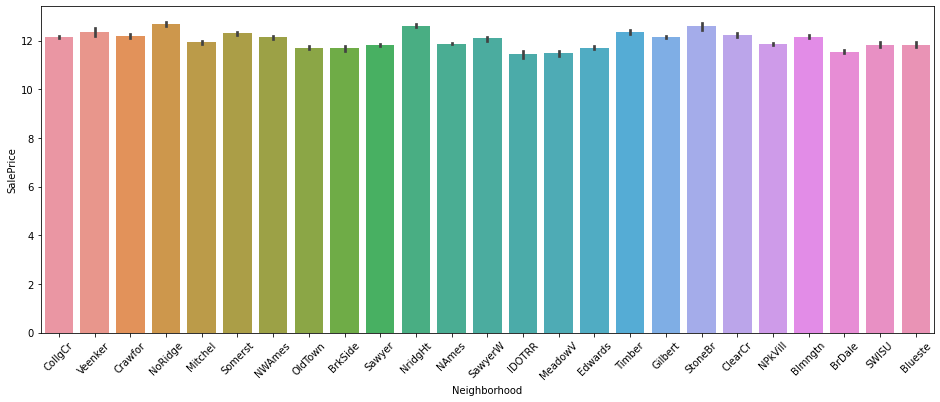

In [39]:
# Correlación entre Vecindario y SalePrice

plt.figure(figsize=(16, 6))
ax = sns.barplot(x = data_recat["Neighborhood"], y = data_recat["SalePrice"])
#label_values(ax)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

In [40]:
alto=["StoneBr","NridgHt","NoRidge"]    # Barrios con SalePrice alto
bajo=["MeadowV","IDOTRR","BrDale"]      # Barrios con SalePrice bajo  
medio=[alto,bajo]
condiciones=[
            (data_recat["Neighborhood"].isin(alto)),
            (data_recat["Neighborhood"].isin(bajo)),
            (~data_recat["Neighborhood"].isin(medio))
             ]
valores=[2,0,1]
data_recat["TipoVecindario"]=np.select(condiciones,valores)

data_recat.drop(["Neighborhood"],axis=1, inplace=True)

In [41]:
#data_recat.groupby(["TipoVecindario"])["Neighborhood"].count()

### Eliminación de variables por Multicolinealidad

In [42]:
# Por su alta correlación se elimina
CorrNumNum(data,"GarageYrBlt","YearBuilt") # esto ya esta transformado, habria que quitar
# Borrar  "GarageYrBlt"
corrNumCat(data,"PoolQC","PoolArea")
# Borrar  "PoolQC"
corrCatCat(data,"GarageCond","GarageQual")
# Borrar  "GarageCond"
corrNumCat(data,"GarageCars","GarageArea")
# Borrar  "GarageArea"
corrNumCat(data,"FireplaceQu","Fireplaces")
# Borrar  "Fireplaces"
CorrNumNum(data,"TotRmsAbvGrd","GrLivArea")
# Borrar  "TotRmsAbvGrd"

correlación entre  GarageYrBlt  y  YearBuilt  es:  0.8256674841743421
correlación entre  PoolQC  y  PoolArea  es:  -0.8842503024391005
correlación entre  GarageCond  y  GarageQual  es:  0.5970304958136521
correlación entre  GarageCars  y  GarageArea  es:  0.8824754142814625
correlación entre  FireplaceQu  y  Fireplaces  es:  -0.7282891760748194
correlación entre  TotRmsAbvGrd  y  GrLivArea  es:  0.8254893743088427


In [43]:
# Eliminamos las siguientes variables por la alta correlación entre ellas descritas en la celda anterior
data_recat.drop(["GarageYrBlt"],axis=1, inplace=True)
data_recat.drop(["PoolQC"],axis=1, inplace=True)
data_recat.drop(["GarageCond"],axis=1, inplace=True)
data_recat.drop(["GarageArea"],axis=1, inplace=True)
data_recat.drop(["Fireplaces"],axis=1, inplace=True)
data_recat.drop(["TotRmsAbvGrd"],axis=1, inplace=True)

## **Outliers**

### Borramos valores altos en TotalSF

Podemos poner un boxplot o un violinplot para visualizar los outliers

In [44]:
#scatter plot grlivarea/saleprice
def grafDisp(d,x,y):
  graf = pd.concat([d[y], d[x]], axis=1)
  graf.plot.scatter(x=x, y=y,figsize=(12, 6))
def borrarFilas(d,c,v):
  d.drop(d[d[c] >= v].index, inplace = True)


In [45]:
#data_recat.columns

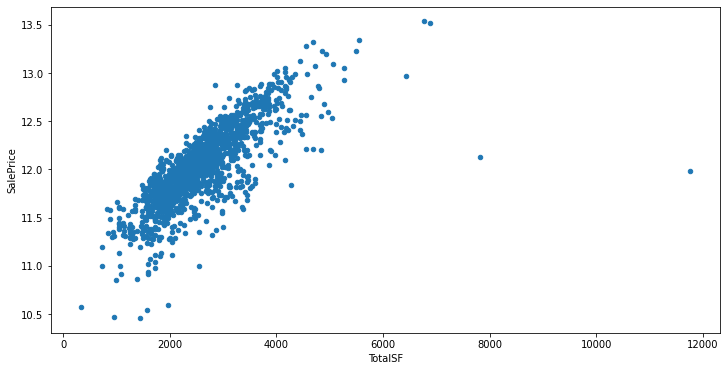

In [46]:
#scatter plot grlivarea/saleprice

grafDisp(data_recat,"TotalSF","SalePrice")

In [47]:
data_recat[data_recat["TotalSF"]>7000][["TotalSF","SalePrice"]]

,TotalSF,SalePrice
523,7814,12.13
1298,11752,11.98


In [48]:
borrarFilas(data_recat,'TotalSF',7000)


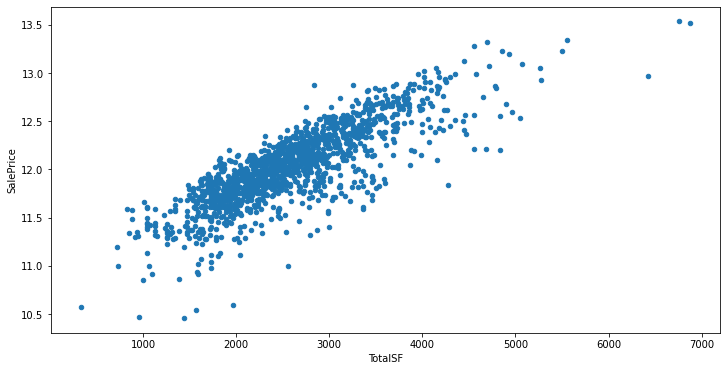

In [49]:
grafDisp(data_recat,"TotalSF","SalePrice")

### Borramos valores altos en PoolArea

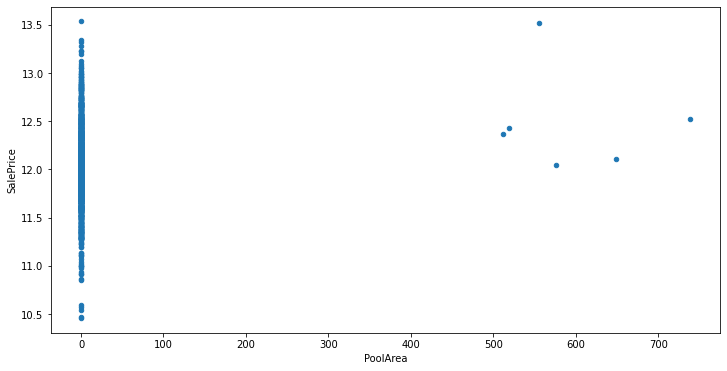

In [50]:
#scatter plot grlivarea/saleprice
grafDisp(data_recat,"PoolArea","SalePrice")

In [51]:
data_recat[data_recat["PoolArea"]>500][["PoolArea","SalePrice"]]

,PoolArea,SalePrice
197,512,12.37
810,648,12.11
1170,576,12.05
1182,555,13.52
1386,519,12.43
1423,738,12.52


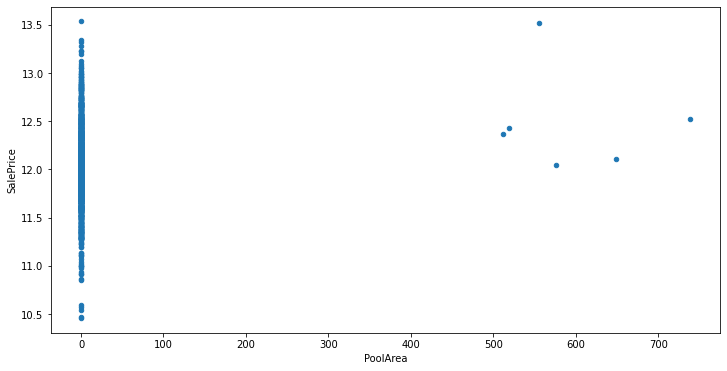

In [52]:
grafDisp(data_recat,"PoolArea","SalePrice")

### Borramos valores altos en MiscVal

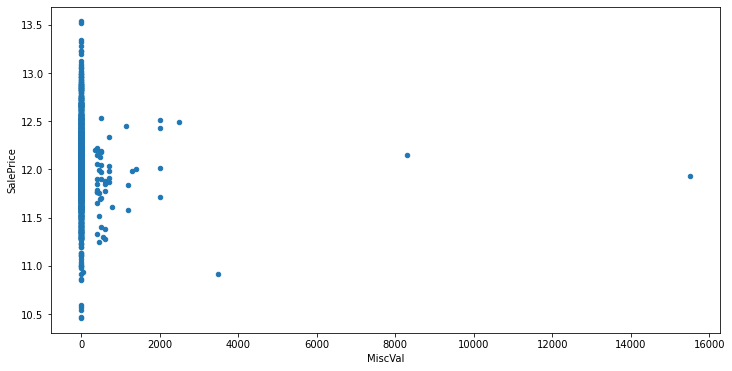

In [53]:
#scatter plot grlivarea/saleprice
grafDisp(data_recat,"MiscVal","SalePrice")

In [54]:
data_recat[data_recat["MiscVal"]>8000][["MiscVal","SalePrice"]]

,MiscVal,SalePrice
346,15500,11.93
1230,8300,12.15


In [55]:
borrarFilas(data_recat,'MiscVal',8000)

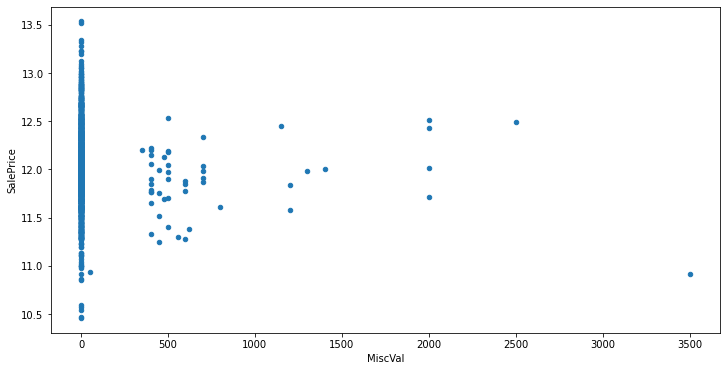

In [56]:
grafDisp(data_recat,"MiscVal","SalePrice")

### Borramos valores altos en LotArea

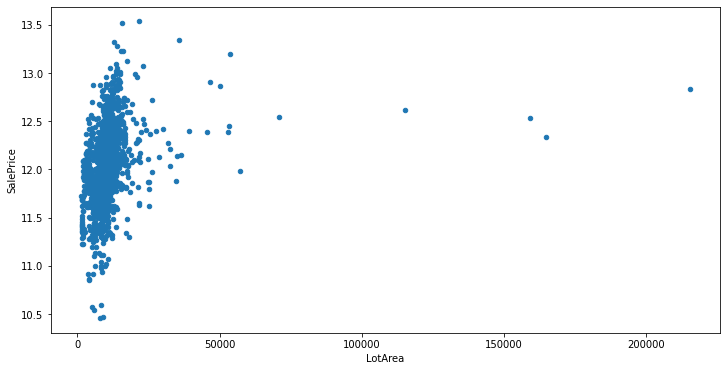

In [57]:
#scatter plot grlivarea/saleprice
grafDisp(data_recat,"LotArea","SalePrice")

In [58]:
data_recat[data_recat["LotArea"]>100000][["LotArea","SalePrice"]]

,LotArea,SalePrice
249,159000,12.53
313,215245,12.83
335,164660,12.34
706,115149,12.62


In [59]:
borrarFilas(data_recat,'LotArea',100000)

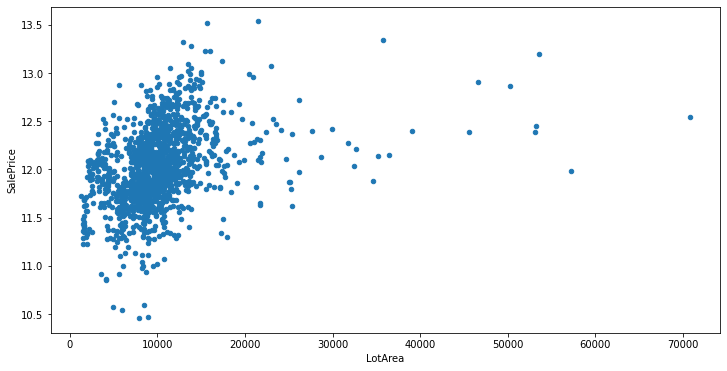

In [60]:
grafDisp(data_recat,"LotArea","SalePrice")

### Borramos valores altos en MasVnrArea

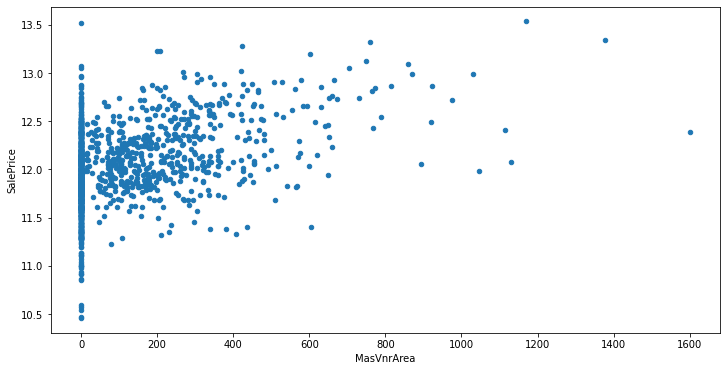

In [61]:
#scatter plot grlivarea/saleprice
grafDisp(data_recat,"MasVnrArea","SalePrice")

In [62]:
data_recat[data_recat["MasVnrArea"]>1300][["LotArea","SalePrice"]]

,LotArea,SalePrice
297,7399,12.38
1169,35760,13.35


In [63]:
borrarFilas(data_recat,'MasVnrArea',1300)


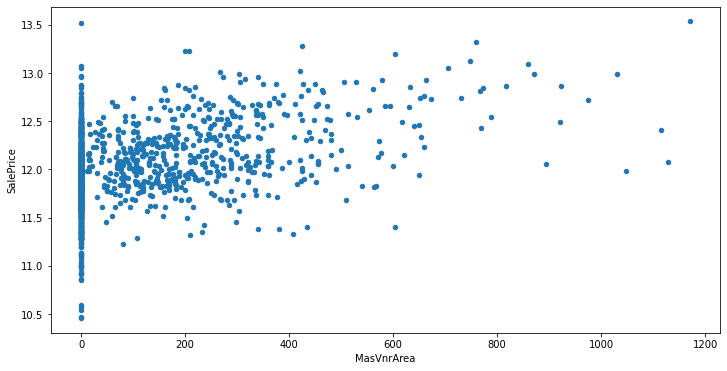

In [64]:
grafDisp(data_recat,"MasVnrArea","SalePrice")

### Borramos valores altos en SalePrice vs Edad de Remodelación

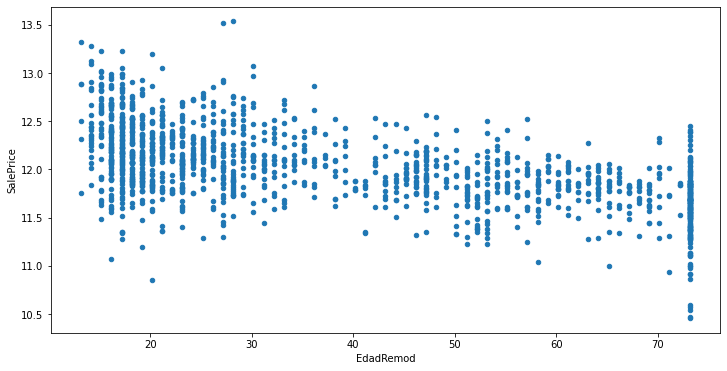

In [65]:
#scatter plot grlivarea/saleprice
grafDisp(data_recat,"EdadRemod","SalePrice")

### Borramos valores altos en TotalBathrooms

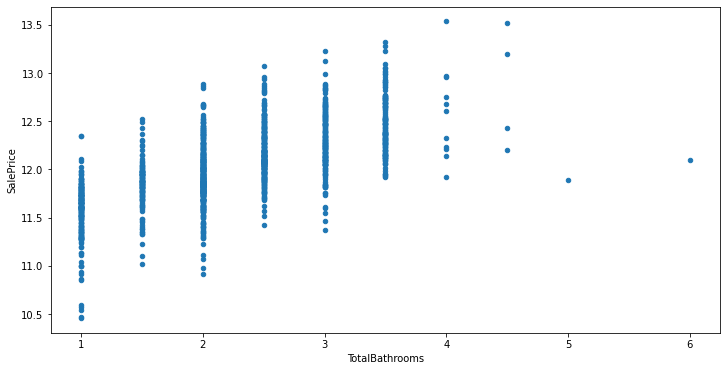

In [66]:
#scatter plot grlivarea/saleprice
grafDisp(data_recat,"TotalBathrooms","SalePrice")

In [67]:
data_recat[data_recat["TotalBathrooms"]>=5][["TotalBathrooms","SalePrice"]]

,TotalBathrooms,SalePrice
738,6.00,12.10
921,5.00,11.89


In [68]:
borrarFilas(data_recat,'TotalBathrooms',4.5)

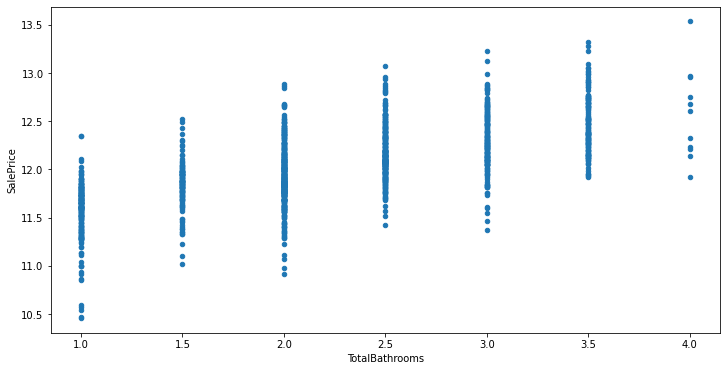

In [69]:
grafDisp(data_recat,"TotalBathrooms","SalePrice")

### Borramos valores altos en LotArea

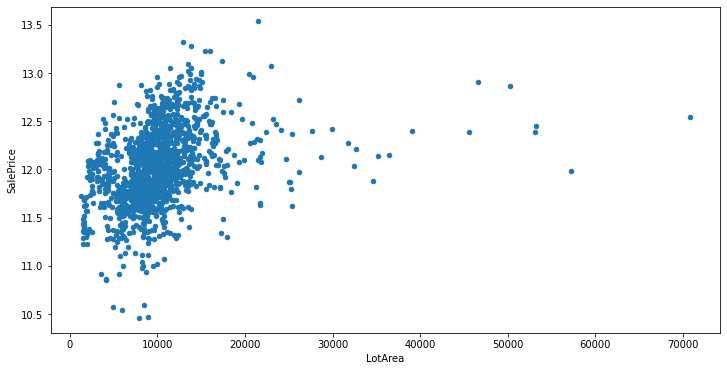

In [70]:
#scatter plot grlivarea/saleprice
grafDisp(data_recat,"LotArea","SalePrice")

In [71]:
data_recat[data_recat["LotArea"]>=40000][["LotArea","SalePrice"]]

,LotArea,SalePrice
53,50271,12.86
384,53107,12.39
451,70761,12.54
457,53227,12.45
661,46589,12.90
848,45600,12.39
1396,57200,11.98


In [72]:
borrarFilas(data_recat,'LotArea',40000)

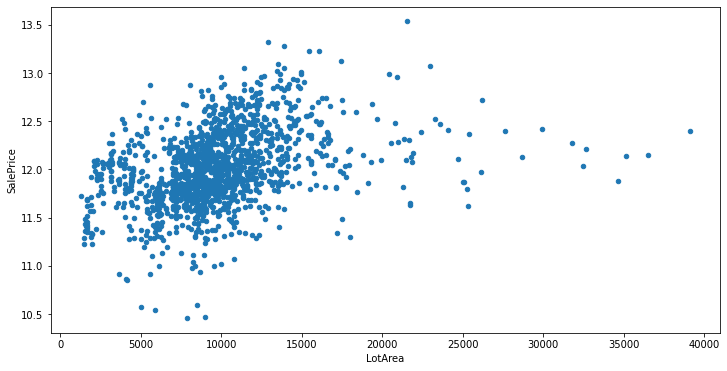

In [73]:
grafDisp(data_recat,"LotArea","SalePrice")

### Borramos valores altos en LotFrontage

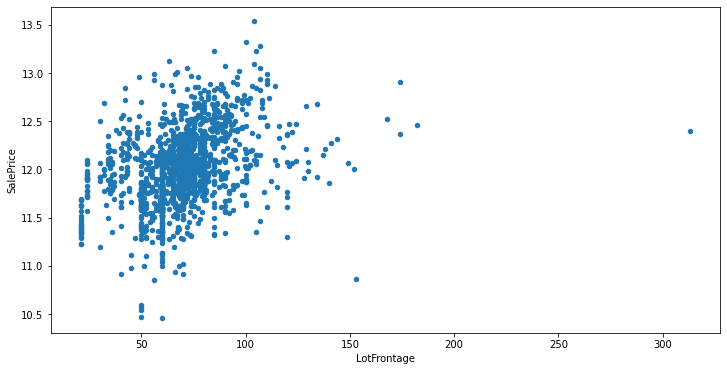

In [74]:
#scatter plot grlivarea/saleprice
grafDisp(data_recat,"LotFrontage","SalePrice")

In [75]:
data_recat[data_recat["LotFrontage"]>=300][["LotFrontage","SalePrice"]]

,LotFrontage,SalePrice
934,313.00,12.40


In [76]:
borrarFilas(data_recat,'LotFrontage',300)

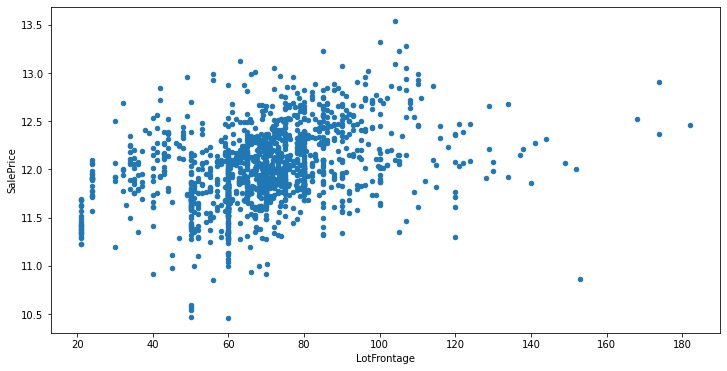

In [77]:
grafDisp(data_recat,"LotFrontage","SalePrice")

### Borramos valores altos en TotaPorchSF

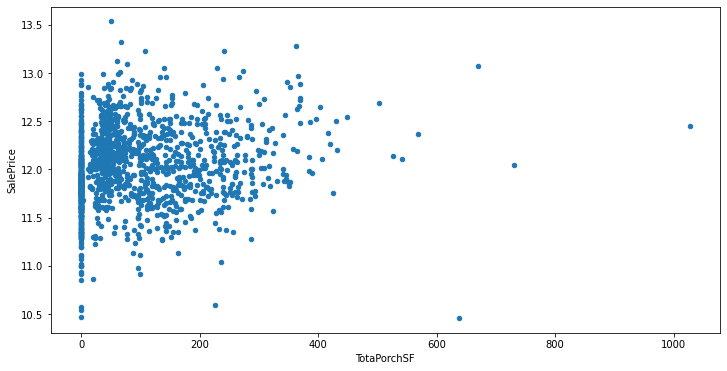

In [78]:
#scatter plot grlivarea/saleprice
grafDisp(data_recat,"TotaPorchSF","SalePrice")

In [79]:
data_recat[data_recat["TotaPorchSF"]>=630][["TotaPorchSF","SalePrice"]]

,TotaPorchSF,SalePrice
185,670,13.07
495,638,10.46
854,730,12.04
1328,1027,12.45


In [80]:
borrarFilas(data_recat,'TotaPorchSF',630)

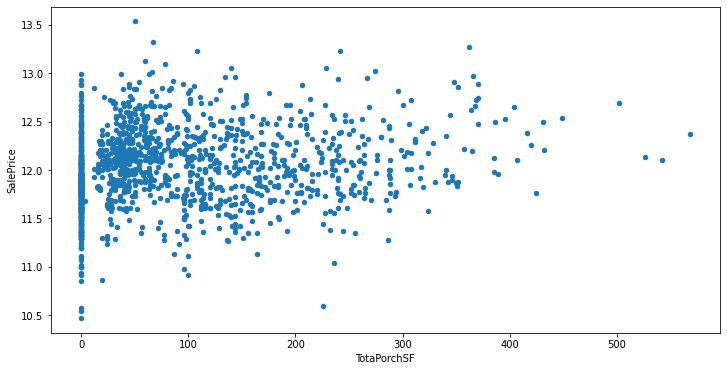

In [81]:
grafDisp(data_recat,"TotaPorchSF","SalePrice")

## Derived Data

#### Variables Dummy 

In [82]:
v1 =  ['Street']
def dummies(x):
    return x.map({'Pave': 1, "Grvl": 0})
data_recat[v1] = data_recat[v1].apply(dummies)

v2 =  ['Utilities']
def dummies(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})
data_recat[v2] = data_recat[v2].apply(dummies)

v3 =  ['CentralAir']
def dummies(x):
    return x.map({'Y': 1, "N": 0})
data_recat[v3] = data_recat[v3].apply(dummies)

# 5. Analisis de Datos

## Análisis-Univariable

In [83]:
numeric_cols = data_recat.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_recat.select_dtypes(include=['object']).columns

# Imprimir las columnas
print("Numeric columns: ", numeric_cols)
print("Categorical columns: ", categorical_cols)

Numeric columns:  Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Utilities', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'CentralAir', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageCars', 'WoodDeckSF', 'PoolArea', 'MiscVal',
       'SalePrice', 'TotalSF', 'TotalBathrooms', 'TotaPorchSF', 'EdadCasa',
       'EdadVendido', 'EdadRemod', 'TipoVecindario'],
      dtype='object')
Categorical columns:  Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='objec

### Plot Numeric Data

* OverallQual

Mean:  6.085893854748603
Median:  6.0
Mode:  5
Standard deviation:  1.3675982548354162
Range:  9


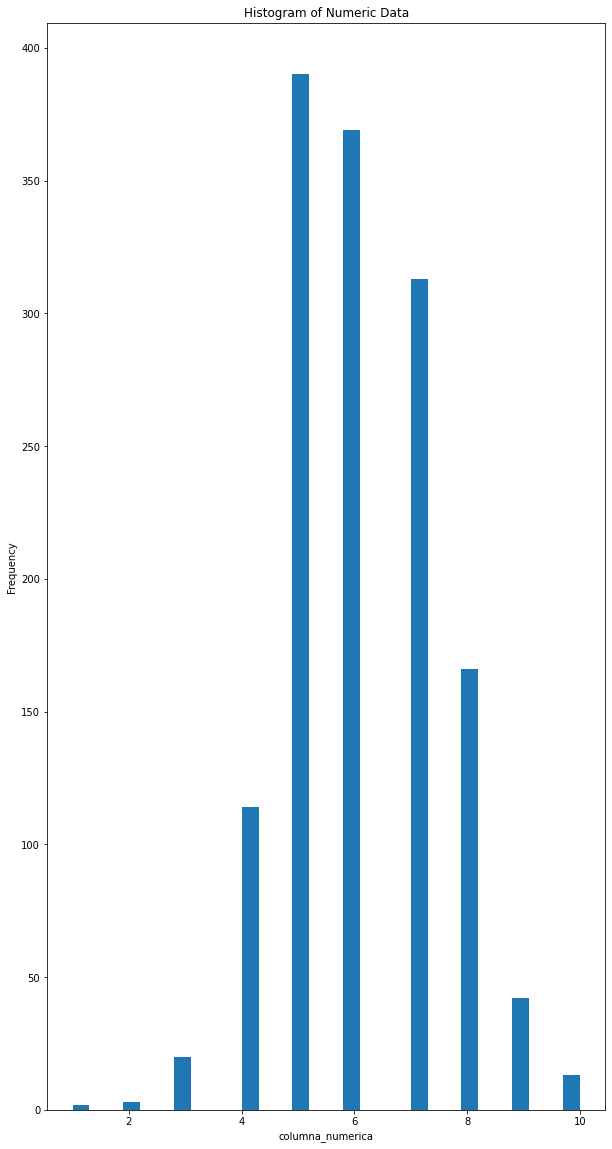

In [84]:
# Seleccionar la columna de interés
col = data_recat['OverallQual']

# Calcular medidas de tendencia central y de dispersión
mean = col.mean()
median = col.median()
mode = col.mode().values[0]
std = col.std()
range = col.max() - col.min()

# Imprimir los resultados
print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard deviation: ", std)
print("Range: ", range)

# Visualizar la distribución de los datos con un histograma
plt.hist(col, bins=30)
plt.xlabel("columna_numerica")
plt.ylabel("Frequency")
plt.title("Histogram of Numeric Data")
plt.show()

### 5.1.2	Plot Categorical Data

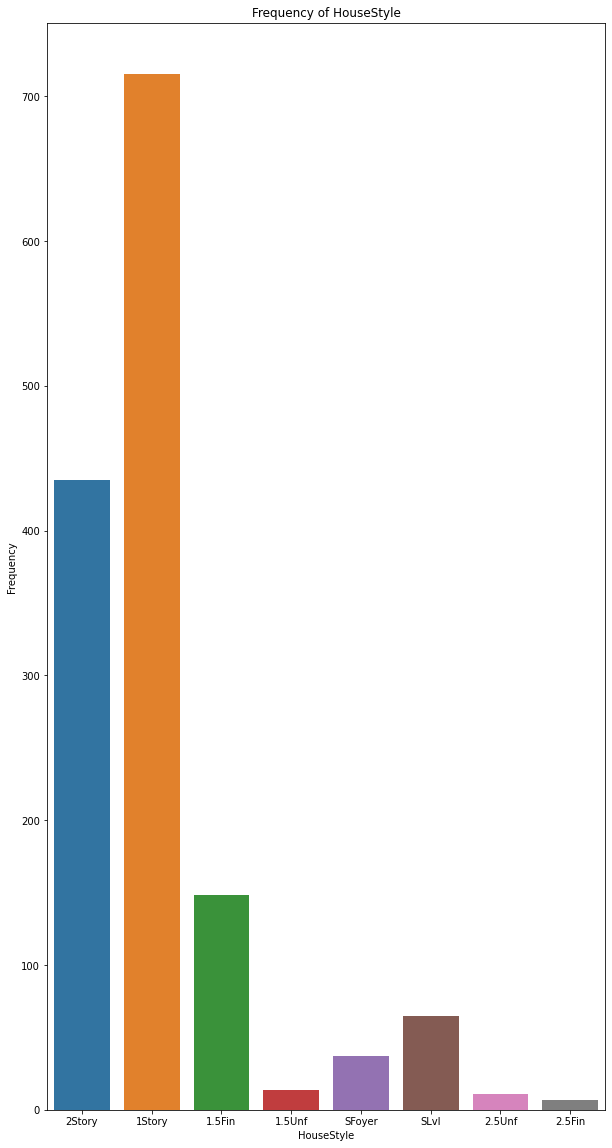

In [85]:
sns.countplot(x='HouseStyle', data=data_recat)

# Agregar título y etiquetas de eje
plt.title('Frequency of HouseStyle')
plt.xlabel('HouseStyle')
plt.ylabel('Frequency')

# Mostrar gráfico
plt.show()

## 5.2. Análisis-Bivariable

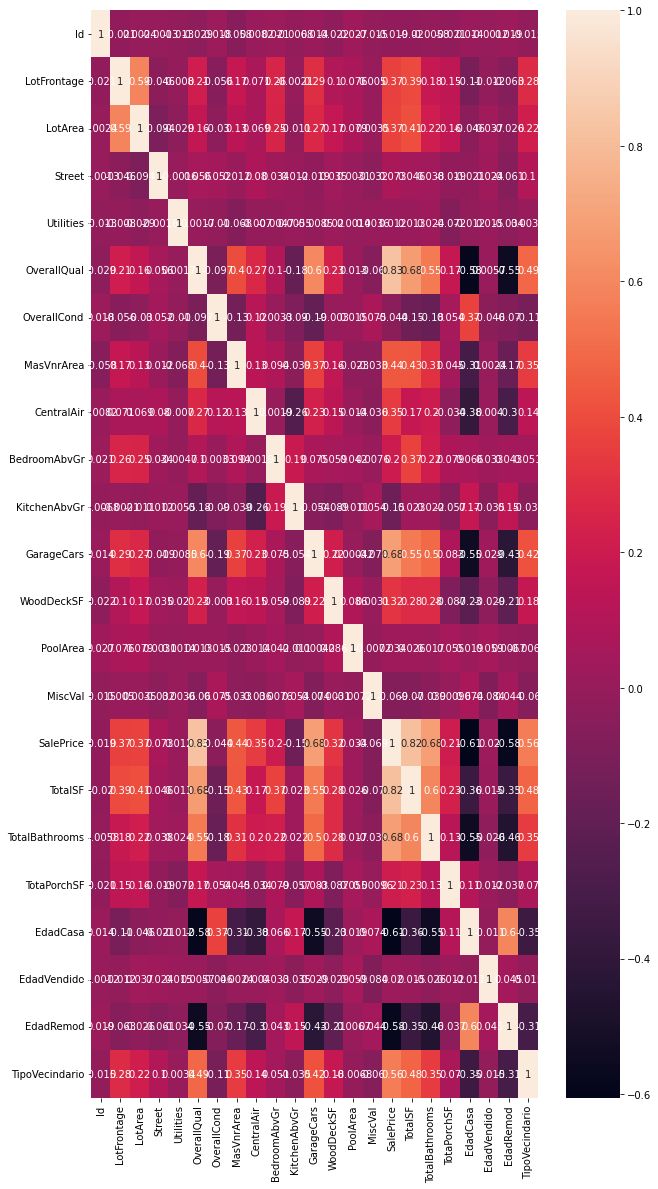

In [86]:
# Análisis de correlación
correlation = data_recat.corr()

# Visualización de los resultados usando un mapa de calor
sns.heatmap(correlation, annot=True)
plt.show()

# 6.	Preparacion de Datos y Modelado

In [87]:
campos_categoricos=data_recat.select_dtypes(include=[np.object])
campos_categoricos.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,No,Reg,Lvl,Inside,Gtl,Norm,Norm,1Fam,...,Typ,No,Attchd,RFn,TA,Y,No,No,WD,Normal
1,20,RL,No,Reg,Lvl,FR2,Gtl,Feedr,Norm,1Fam,...,Typ,TA,Attchd,RFn,TA,Y,No,No,WD,Normal
2,60,RL,No,IR1,Lvl,Inside,Gtl,Norm,Norm,1Fam,...,Typ,TA,Attchd,RFn,TA,Y,No,No,WD,Normal
3,70,RL,No,IR1,Lvl,Corner,Gtl,Norm,Norm,1Fam,...,Typ,Gd,Detchd,Unf,TA,Y,No,No,WD,Abnorml
4,60,RL,No,IR1,Lvl,FR2,Gtl,Norm,Norm,1Fam,...,Typ,TA,Attchd,RFn,TA,Y,No,No,WD,Normal


In [88]:
# Realizamo el HotEncoding de las variables categóricas
onehot = pd.get_dummies(campos_categoricos, drop_first=True)

In [89]:
dataOK = data_recat.copy()
dataOK = data_recat.drop(list(campos_categoricos.columns), axis=1)
dataOK = pd.concat([dataOK,onehot], axis=1)

In [90]:
dataOK.drop(["Id"],axis=1, inplace=True)
dataOK.shape

(1432, 220)

In [91]:
X = dataOK
y = X["SalePrice"]
X = X.drop("SalePrice",1)
X.shape

(1432, 219)

In [92]:
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
escalador.fit_transform(X)

array([[-0.23708678, -0.30532635,  0.05919336, ..., -0.11901389,
         0.46656947, -0.30653688],
       [ 0.50941161, -0.03216022,  0.05919336, ..., -0.11901389,
         0.46656947, -0.30653688],
       [-0.08778711,  0.35977379,  0.05919336, ..., -0.11901389,
         0.46656947, -0.30653688],
       ...,
       [-0.18732022, -0.16470518,  0.05919336, ..., -0.11901389,
         0.46656947, -0.30653688],
       [-0.08778711, -0.00436853,  0.05919336, ..., -0.11901389,
         0.46656947, -0.30653688],
       [ 0.26057881,  0.04788933,  0.05919336, ..., -0.11901389,
         0.46656947, -0.30653688]])

## Splitting data into Train Test

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size = 0.2, random_state=34)
X_test.shape

(287, 219)

In [94]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

Text(0.5, 0, 'Random Forest Feature Importance')

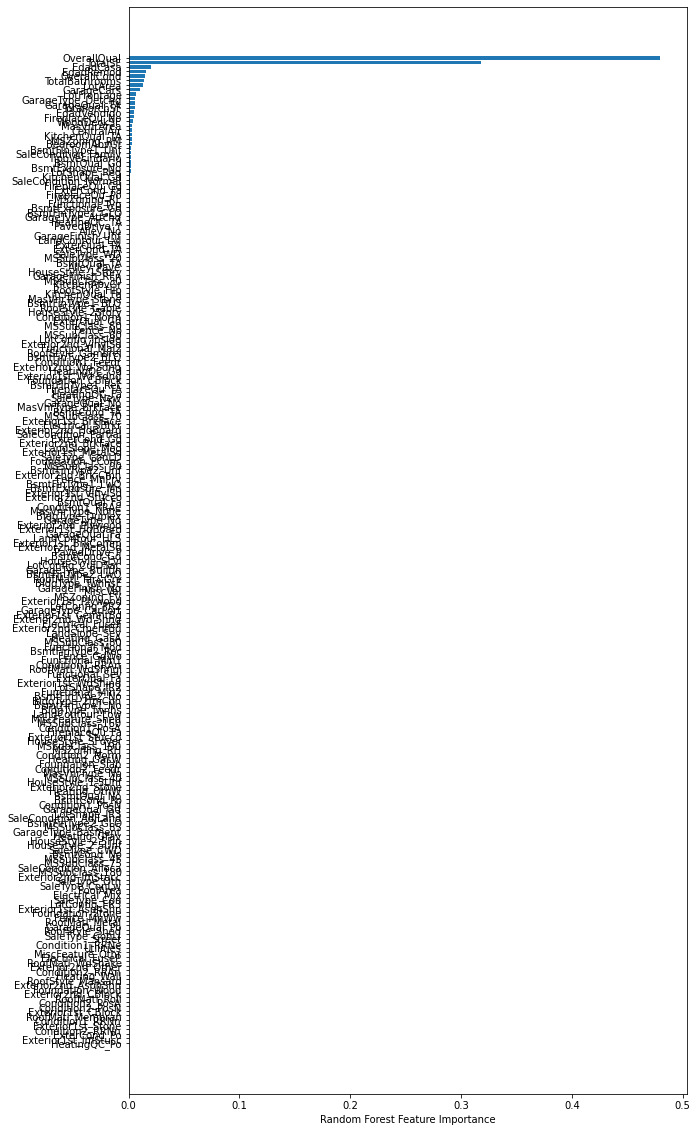

In [95]:
#### plt.rcParams.update({'figure.figsize': (10, 38)})
plt.rcParams.update({'font.size': 10})
#plt.barh(X.columns, rf.feature_importances_)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Datos más relevantes

In [96]:
sorted_idx = (-rf.feature_importances_).argsort()
for i, feature in enumerate(X.columns[sorted_idx][:10]):
    print(f"{feature}: {rf.feature_importances_[sorted_idx][i]}")

OverallQual: 0.4795848288617084
TotalSF: 0.3181412433025306
EdadCasa: 0.02054480466759565
EdadRemod: 0.015781796626796445
OverallCond: 0.014878297731320796
TotalBathrooms: 0.01418814438958416
LotArea: 0.013412865478484982
GarageCars: 0.010485666312905886
LotFrontage: 0.007020597469926054
GarageType_Detchd: 0.00587672043350337


In [97]:
sorted_idx = rf.feature_importances_.argsort()
for i, feature in enumerate(X.columns[sorted_idx]):
    print(f"{feature}: {rf.feature_importances_[sorted_idx][i]}")

HeatingQC_Po: 0.0
Exterior1st_ImStucc: 0.0
ExterCond_Po: 0.0
Condition2_RRNn: 2.462986445055893e-09
Exterior1st_Stone: 2.809241640867468e-08
Condition1_RRNn: 1.1853341756926288e-07
RoofMatl_Membran: 1.6103589883922528e-07
Exterior1st_CBlock: 1.803838533227714e-07
Condition2_PosN: 2.816830383151056e-07
Condition2_PosA: 3.433383042306053e-07
RoofMatl_Roll: 3.952163691364169e-07
Exterior2nd_CBlock: 5.154557799721941e-07
Foundation_Wood: 5.298992263961485e-07
Exterior2nd_AsphShn: 5.559749550153617e-07
RoofStyle_Mansard: 7.409869474323695e-07
Heating_Wall: 8.245479906940714e-07
Condition2_RRAn: 9.94786631806046e-07
Exterior2nd_Other: 1.0015727344260623e-06
RoofMatl_WdShake: 1.3540422639976561e-06
Electrical_FuseP: 1.4367662850024201e-06
MiscFeature_Othr: 1.5619496679286553e-06
Utilities: 1.6340426552199651e-06
Condition1_RRNe: 1.96698057086487e-06
Street: 2.2207007579425345e-06
SaleType_ConLI: 2.8154148059084644e-06
RoofStyle_Shed: 3.483504785846198e-06
GarageQual_Po: 3.7728944089123074e-06

# 7. Construccion-del-Modelo

## Regresión Lineal

In [98]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)

# metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train_lr)
print("R2 Train Score: ", r2_train_lr)
# metric_lr.append(r2_train_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
print("Mean Squared Train Error Train: ", mse_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
print("Mean Squared Train Error Test: ", mse_test_lr)
#metric_lr.append(mse_train_lr**0.5)

R2 Train Score:  0.9447597056672834
Mean Squared Train Error Train:  0.008542065831366885
Mean Squared Train Error Test:  0.015334168387732739


* **Resultado**

    El R2 Train Score de 0.944 indica que el 94.4% de la variabilidad en la variable dependiente puede explicarse por las variables independientes en el modelo. 

    El Mean Squared Train Error Train es una medida de la diferencia entre los valores reales y predichos indica que tenemos un 0.093% de error, despues de sacar la raiz cuadrada.

  El Mean Squared Train Error test de 0.0153 indica la diferencia promedio entre los valores reales y predichos en los datos de prueba. Un MSE más alto en el conjunto de prueba en comparación con el conjunto de entrenamiento indica un sobreajuste en los datos de prueba no haciendo una buena predicción para datos nuevos. Por este motivo buscaremos regularizar el modelo con los siguientes métodos de regularización.

## Ridge Regression

In [100]:
parametros = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1,3,5,7,9,10,20,50,100,500,1000]}

In [117]:
ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = parametros, scoring= 'neg_mean_absolute_error', cv = folds,return_train_score=True,verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                                   1, 3, 5, 7, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [118]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 50}
-0.07999535640929578


In [119]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.02,0.00,0.01,0.00,0.00,{'alpha': 0.0001},-0.08,-0.10,-0.10,-0.10,...,-0.09,0.01,18,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
1,0.02,0.00,0.01,0.00,0.00,{'alpha': 0.001},-0.08,-0.10,-0.10,-0.10,...,-0.09,0.01,17,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
2,0.03,0.00,0.01,0.00,0.01,{'alpha': 0.01},-0.08,-0.10,-0.10,-0.10,...,-0.09,0.01,16,-0.07,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
3,0.03,0.00,0.01,0.00,0.10,{'alpha': 0.1},-0.08,-0.10,-0.09,-0.10,...,-0.09,0.01,15,-0.07,-0.06,-0.06,-0.06,-0.07,-0.06,0.00
4,0.03,0.01,0.01,0.00,0.30,{'alpha': 0.3},-0.08,-0.10,-0.09,-0.09,...,-0.09,0.01,13,-0.07,-0.06,-0.06,-0.06,-0.07,-0.06,0.00
5,0.05,0.01,0.02,0.00,0.50,{'alpha': 0.5},-0.08,-0.10,-0.09,-0.09,...,-0.09,0.01,12,-0.07,-0.06,-0.06,-0.06,-0.07,-0.06,0.00
6,0.05,0.01,0.01,0.00,0.70,{'alpha': 0.7},-0.07,-0.10,-0.09,-0.09,...,-0.09,0.01,11,-0.07,-0.06,-0.07,-0.07,-0.07,-0.07,0.00
7,0.05,0.00,0.02,0.00,0.90,{'alpha': 0.9},-0.07,-0.09,-0.09,-0.09,...,-0.09,0.01,10,-0.07,-0.06,-0.07,-0.07,-0.07,-0.07,0.00
8,0.05,0.01,0.02,0.00,1,{'alpha': 1},-0.07,-0.09,-0.09,-0.09,...,-0.09,0.01,9,-0.07,-0.06,-0.07,-0.07,-0.07,-0.07,0.00
9,0.05,0.00,0.02,0.00,3,{'alpha': 3},-0.07,-0.09,-0.08,-0.09,...,-0.08,0.01,8,-0.07,-0.06,-0.07,-0.07,-0.07,-0.07,0.00


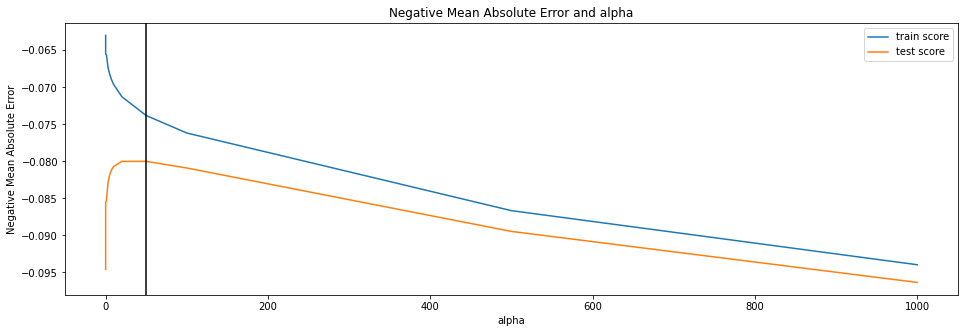

In [104]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
#mejor=int(model_cv.best_params_[1])

plt.axvline(x = model_cv.best_params_['alpha'], color = 'black', label = 'best')
plt.show()

In [105]:
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 3.53369097e-04,  6.32953779e-06,  2.98418232e-03,  3.40874370e-03,
        5.73237882e-02,  5.05547056e-02,  4.76525732e-05,  2.57429951e-02,
       -5.78540591e-03, -2.78991997e-02,  3.47689446e-02,  8.62268064e-05,
        2.68725873e-04, -2.29587732e-05,  1.88399848e-04,  3.66869545e-02,
        1.83021044e-04, -2.19033095e-03,  5.24302459e-03, -6.66008368e-04,
        3.95510834e-02, -1.61125643e-02, -8.01385617e-03, -4.01687629e-03,
        2.11866044e-03, -2.48365994e-02,  9.68165561e-04, -1.26809305e-03,
        2.01904554e-02,  5.72114570e-03,  2.14523495e-02, -1.03628652e-03,
        2.40618177e-03,  2.80210711e-03, -7.47630854e-03,  3.25096787e-02,
       -1.43929548e-03,  2.33903647e-02, -1.99340726e-02,  1.25524683e-02,
       -6.75258092e-04,  2.67170784e-03,  6.96667531e-04,  9.93327289e-05,
        9.77535400e-03, -8.52584129e-03, -2.19499598e-03,  1.20151408e-02,
       -7.27618642e-03, -2.67284534e-03, -5.54171018e-03,  9.42814810e-03,
       -6.93741422e-03,  

In [106]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

# metric_lr = []
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
print("R2 Train Score: ", r2_train_ridge)
# metric_lr.append(r2_train_lr)

mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
print("Mean Squared Train Error Train: ", mse_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
print("Mean Squared Train Error Test: ", mse_test_ridge)
#metric_lr.append(mse_train_lr**0.5)

R2 Train Score:  0.928606923458324
Mean Squared Train Error Train:  0.011039846313085714
Mean Squared Train Error Test:  0.015345018802453498


- **Resultado**

  Tenemos los mismos parámetros obtenidos en la regresión Lineal, sin embargo podemos notar que despues de la regularización la diferencia entre errores disminuye significativamente, por lo que podemos notar una mejora del modelo.

## Lasso Regression

In [107]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,param_grid = parametros,scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                                   1, 3, 5, 7, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [108]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.16,0.06,0.01,0.00,0.00,{'alpha': 0.0001},-0.07,-0.09,-0.09,-0.09,...,-0.08,0.01,2,-0.07,-0.06,-0.07,-0.07,-0.07,-0.07,0.00
1,0.03,0.01,0.01,0.00,0.00,{'alpha': 0.001},-0.07,-0.09,-0.08,-0.08,...,-0.08,0.01,1,-0.08,-0.07,-0.07,-0.07,-0.08,-0.07,0.00
2,0.02,0.01,0.01,0.00,0.01,{'alpha': 0.01},-0.09,-0.11,-0.09,-0.09,...,-0.09,0.01,3,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,0.00
3,0.02,0.01,0.01,0.00,0.10,{'alpha': 0.1},-0.11,-0.14,-0.12,-0.12,...,-0.12,0.01,4,-0.12,-0.11,-0.12,-0.12,-0.12,-0.12,0.00
4,0.01,0.00,0.01,0.00,0.30,{'alpha': 0.3},-0.11,-0.14,-0.12,-0.12,...,-0.12,0.01,5,-0.12,-0.11,-0.12,-0.12,-0.12,-0.12,0.00
5,0.02,0.01,0.01,0.00,0.50,{'alpha': 0.5},-0.11,-0.14,-0.12,-0.12,...,-0.12,0.01,6,-0.12,-0.11,-0.12,-0.12,-0.12,-0.12,0.00
6,0.02,0.01,0.01,0.00,0.70,{'alpha': 0.7},-0.11,-0.14,-0.13,-0.12,...,-0.12,0.01,7,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,0.00
7,0.01,0.00,0.01,0.00,0.90,{'alpha': 0.9},-0.11,-0.14,-0.13,-0.12,...,-0.12,0.01,8,-0.13,-0.12,-0.12,-0.12,-0.12,-0.12,0.00
8,0.01,0.01,0.00,0.00,1,{'alpha': 1},-0.11,-0.14,-0.13,-0.13,...,-0.13,0.01,9,-0.13,-0.12,-0.12,-0.13,-0.13,-0.12,0.00
9,0.02,0.01,0.01,0.00,3,{'alpha': 3},-0.14,-0.17,-0.16,-0.16,...,-0.15,0.01,10,-0.16,-0.15,-0.15,-0.15,-0.15,-0.15,0.00


In [109]:
# Rcuadrado del modelo lasso
model_cv1 = GridSearchCV(estimator = lasso,  param_grid = parametros, scoring= 'r2', cv = folds,  verbose = 1, return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9,
                                   1, 3, 5, 7, 9, 10, 20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [110]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.14,0.04,0.01,0.00,0.00,{'alpha': 0.0001},0.93,0.88,0.91,0.88,...,0.90,0.02,2,0.94,0.95,0.94,0.95,0.94,0.95,0.00
1,0.05,0.03,0.01,0.00,0.00,{'alpha': 0.001},0.93,0.89,0.92,0.90,...,0.91,0.02,1,0.92,0.93,0.93,0.93,0.92,0.93,0.00
2,0.04,0.01,0.01,0.00,0.01,{'alpha': 0.01},0.90,0.86,0.89,0.89,...,0.89,0.01,3,0.89,0.90,0.89,0.89,0.89,0.89,0.00
3,0.04,0.01,0.01,0.00,0.10,{'alpha': 0.1},0.84,0.79,0.82,0.82,...,0.82,0.02,4,0.82,0.83,0.83,0.83,0.82,0.83,0.00
4,0.04,0.01,0.02,0.00,0.30,{'alpha': 0.3},0.84,0.79,0.82,0.82,...,0.82,0.02,5,0.82,0.83,0.83,0.83,0.82,0.82,0.00
5,0.05,0.00,0.02,0.00,0.50,{'alpha': 0.5},0.84,0.79,0.81,0.81,...,0.82,0.02,6,0.82,0.83,0.82,0.82,0.82,0.82,0.00
6,0.04,0.00,0.02,0.00,0.70,{'alpha': 0.7},0.84,0.78,0.81,0.80,...,0.81,0.02,7,0.81,0.82,0.82,0.82,0.81,0.82,0.00
7,0.04,0.00,0.02,0.00,0.90,{'alpha': 0.9},0.84,0.77,0.80,0.79,...,0.81,0.02,8,0.81,0.82,0.81,0.81,0.81,0.81,0.00
8,0.03,0.01,0.01,0.00,1,{'alpha': 1},0.83,0.77,0.80,0.79,...,0.80,0.02,9,0.80,0.81,0.81,0.81,0.80,0.81,0.00
9,0.03,0.01,0.01,0.00,3,{'alpha': 3},0.74,0.70,0.72,0.69,...,0.72,0.02,10,0.72,0.73,0.73,0.73,0.72,0.73,0.01


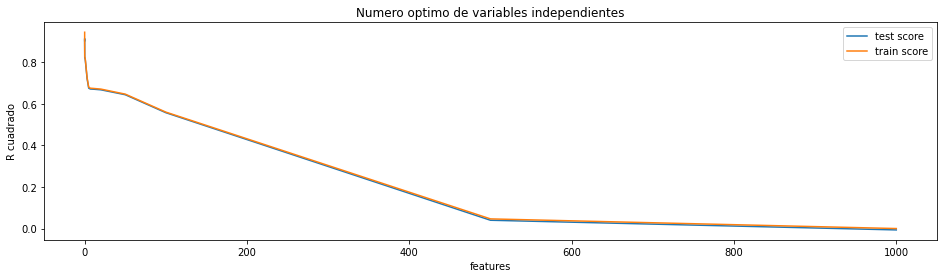

In [111]:
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('features')
plt.ylabel('R cuadrado')
plt.title("Numero optimo de variables independientes")
plt.legend(['test score', 'train score'], loc='upper right')

In [112]:

print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.08023012790356922


In [113]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [114]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.898116822322251


In [115]:
# esto creo que no iria 
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(modelo):
    rmse= np.sqrt(-cross_val_score(modelo, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

In [116]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

# metric_lr = []
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
print("R2 Train Score: ", r2_train_lasso)
# metric_lr.append(r2_train_lr)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
print("Mean Squared Train Error Train: ", mse_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)
print("Mean Squared Train Error Test: ", mse_test_lasso)
#metric_lr.append(mse_train_lr**0.5)

R2 Train Score:  0.940788080005666
Mean Squared Train Error Train:  0.00915621693734657
Mean Squared Train Error Test:  0.014868807553007466


# 8.	Conclusions y Observaciones

### Conclusiones:

* Por la notable mejora despues del proceso de regularización Ridge Regression, es el modelo que tomaremos en cuenta para este trabajo.

* El análisis de regresión mostró que existe una relación significativa entre las variables incluidas en el modelo y el precio de la propiedad. El valor del coeficiente de determinación (R^2) de 0.9286 indica que el 92.86% de la variación en el precio de la propiedad puede explicarse por las variables incluidas en el modelo.

* Los resultados del análisis de regresión sugieren que los siguientes valores, son lo más importantes al momento de tomar la desicion de comparar una casa para poder aumentar su valor:

    * OverallQual (Material general y el acabado de la casa)
    * TotalSF (pies cuadrados totales del área de sotano)
    * EdadCasa
    * OverallCond (Califica el estado general de la casa)
    * EdadRemod (Fecha de remodelación)
    * LotArea (Tamaño del lote en pies cuadrados)
    * TotalBathrooms (Cantidad de baños)
    * GarageCars (Tamaño del garaje en capacidad de automóviles)
    * LotFrontage (Pies lineales de calle conectados a la propiedad)
    * GarageType_Detchd (Ubicación del garaje)

* En general, los resultados de este análisis de regresión brindan información valiosa para que la empresa tenga en cuenta al tomar decisiones relacionadas con sus propiedades.

### Recomendaciones

* Con base en los resultados del análisis de regresión, recomendamos que la empresa se concentre en buscar casas con las características ya antes enlistadas como principales características para poder mejorar los precios y poder tener un negocio rentable.
